<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.506179,32.522862,21.711723,-5.241486e-06,88.740758,88.740758,5.886709e-07
1,0.0,1.0,64.101031,42.365054,37.093653,-1.544635e-06,153.559736,153.559735,1.240555e-06
2,0.0,2.0,24.551327,24.023717,36.636120,-7.996948e-06,95.211156,95.211158,-1.586074e-06
3,0.0,3.0,53.300730,99.877840,83.862357,-1.194513e-07,247.040926,247.040929,-2.593161e-06
4,0.0,4.0,26.001173,64.362102,43.924855,-4.251052e-08,144.288129,144.288127,2.552142e-06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,94.958074,44.428899,66.035297,5.854746e-07,215.422271,215.422270,1.145771e-06
19996,999.0,16.0,71.996043,70.460405,31.806680,-4.608143e-07,184.263128,184.263127,3.790087e-07
19997,999.0,17.0,79.503766,66.761139,45.846616,-2.039148e-07,202.111521,202.111521,4.231317e-07
19998,999.0,18.0,30.309119,73.480612,51.043636,3.083886e-07,164.833367,164.833367,7.900042e-08


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.506179,32.522862,21.711723,-5.241486e-06,88.740758,88.740758,5.886709e-07
1,0.0,1.0,64.101031,42.365054,37.093653,-1.544635e-06,153.559736,153.559735,1.240555e-06
2,0.0,2.0,24.551327,24.023717,36.636120,-7.996948e-06,95.211156,95.211158,-1.586074e-06
3,0.0,3.0,53.300730,99.877840,83.862357,-1.194513e-07,247.040926,247.040929,-2.593161e-06
4,0.0,4.0,26.001173,64.362102,43.924855,-4.251052e-08,144.288129,144.288127,2.552142e-06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,94.958074,44.428899,66.035297,5.854746e-07,215.422271,215.422270,1.145771e-06
19996,999.0,16.0,71.996043,70.460405,31.806680,-4.608143e-07,184.263128,184.263127,3.790087e-07
19997,999.0,17.0,79.503766,66.761139,45.846616,-2.039148e-07,202.111521,202.111521,4.231317e-07
19998,999.0,18.0,30.309119,73.480612,51.043636,3.083886e-07,164.833367,164.833367,7.900042e-08


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    24.506179  32.522862  ...   88.740758  5.886709e-07
      1.0    64.101031  42.365054  ...  153.559735  1.240555e-06
      2.0    24.551327  24.023717  ...   95.211158 -1.586074e-06
      3.0    53.300730  99.877840  ...  247.040929 -2.593161e-06
      4.0    26.001173  64.362102  ...  144.288127  2.552142e-06
...                ...        ...  ...         ...           ...
999.0 15.0   94.958074  44.428899  ...  215.422270  1.145771e-06
      16.0   71.996043  70.460405  ...  184.263127  3.790087e-07
      17.0   79.503766  66.761139  ...  202.111521  4.231317e-07
      18.0   30.309119  73.480612  ...  164.833367  7.900042e-08
      19.0   25.418661  85.841488  ...  141.559861  4.614836e-07

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    24.506179  32.522862  ...   88.740758  5.886709e-07
      1.0    64.101031  42.365054  ...  153.559735  1.240555e-06
      2.0    24.551327  24.023717  ...   95.211158 -1.586074e-06
      3.0    53.300730  99.877840  ...  247.040929 -2.593161e-06
      4.0    26.001173  64.362102  ...  144.288127  2.552142e-06
...                ...        ...  ...         ...           ...
999.0 15.0   94.958074  44.428899  ...  215.422270  1.145771e-06
      16.0   71.996043  70.460405  ...  184.263127  3.790087e-07
      17.0   79.503766  66.761139  ...  202.111521  4.231317e-07
      18.0   30.309119  73.480612  ...  164.833367  7.900042e-08
      19.0   25.418661  85.841488  ...  141.559861  4.614836e-07

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.506179,32.522862,21.711723,-5.241486e-06,88.740758,88.740758,5.886709e-07
1,0.0,1.0,64.101031,42.365054,37.093653,-1.544635e-06,153.559736,153.559735,1.240555e-06
2,0.0,2.0,24.551327,24.023717,36.636120,-7.996948e-06,95.211156,95.211158,-1.586074e-06
3,0.0,3.0,53.300730,99.877840,83.862357,-1.194513e-07,247.040926,247.040929,-2.593161e-06
4,0.0,4.0,26.001173,64.362102,43.924855,-4.251052e-08,144.288129,144.288127,2.552142e-06
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,94.958074,44.428899,66.035297,5.854746e-07,215.422271,215.422270,1.145771e-06
19996,999.0,16.0,71.996043,70.460405,31.806680,-4.608143e-07,184.263128,184.263127,3.790087e-07
19997,999.0,17.0,79.503766,66.761139,45.846616,-2.039148e-07,202.111521,202.111521,4.231317e-07
19998,999.0,18.0,30.309119,73.480612,51.043636,3.083886e-07,164.833367,164.833367,7.900042e-08


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    24.506179  32.522862  ...   88.740758  5.886709e-07
      1.0    64.101031  42.365054  ...  153.559735  1.240555e-06
      2.0    24.551327  24.023717  ...   95.211158 -1.586074e-06
      3.0    53.300730  99.877840  ...  247.040929 -2.593161e-06
      4.0    26.001173  64.362102  ...  144.288127  2.552142e-06
...                ...        ...  ...         ...           ...
999.0 15.0   94.958074  44.428899  ...  215.422270  1.145771e-06
      16.0   71.996043  70.460405  ...  184.263127  3.790087e-07
      17.0   79.503766  66.761139  ...  202.111521  4.231317e-07
      18.0   30.309119  73.480612  ...  164.833367  7.900042e-08
      19.0   25.418661  85.841488  ...  141.559861  4.614836e-07

[20000 rows x 7 columns]

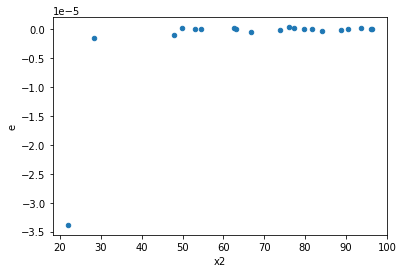

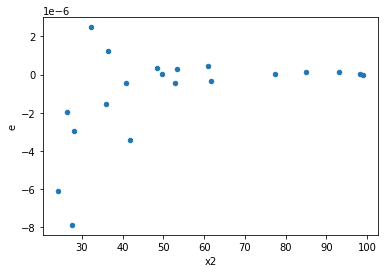

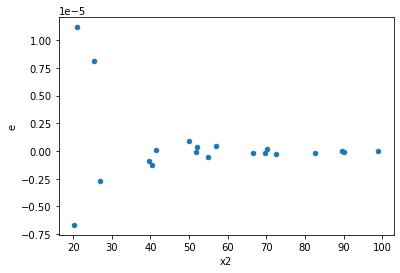

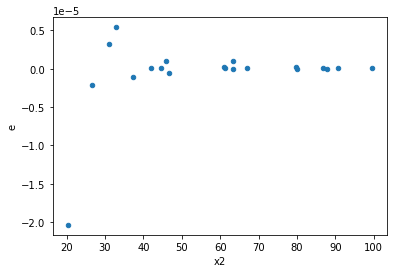

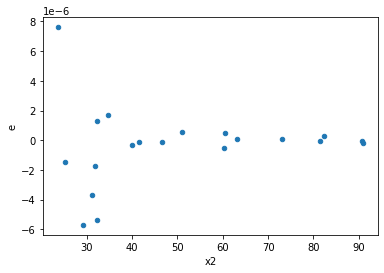

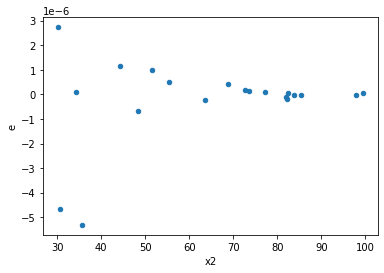

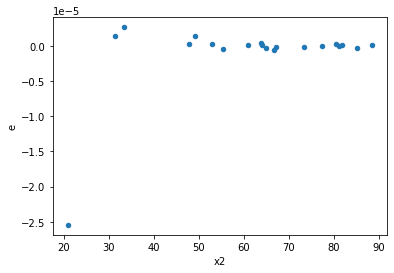

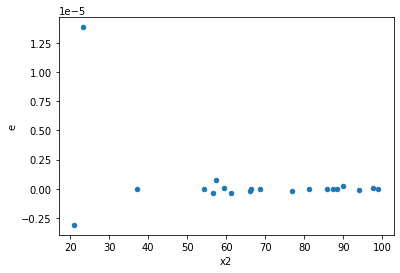

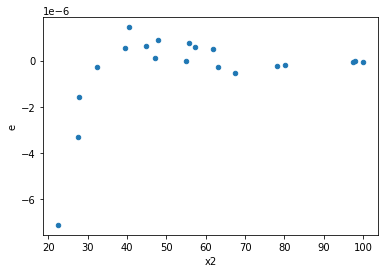

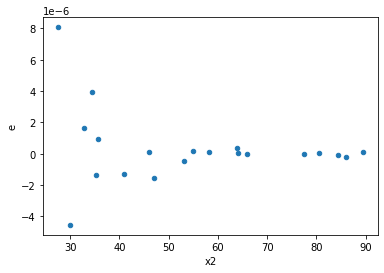

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,5.625368069634777e-14,1.5025427265282418e-11,1.4063420174086943e-14,3.7563568163206044e-12,0.003743898905712112,9.194836408816858e-06,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,4.810968169419266e-14,4.967673339601042e-12,1.2027420423548165e-14,1.2419183349002605e-12,0.009684550171742247,9.689143036205425e-05,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,2.470472609597504e-13,2.8087474322823623e-10,6.17618152399376e-14,7.021868580705906e-11,0.0008795638159569302,2.4850413747447827e-07,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,1.018462071926709e-13,1.2562226004518633e-10,2.5461551798167726e-14,3.140556501129658e-11,0.0008107337597336397,2.027531180709481e-07,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,1.3853345998455526e-14,8.674461016705543e-12,3.4633364996138816e-15,2.168615254176386e-12,0.0015970267169079816,1.1011193032527125e-06,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,9.931524503899448e-15,1.9278801202558878e-10,2.482881125974862e-15,4.8197003006397196e-11,5.1515259686277775e-05,2.069134214991755e-10,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,3.086975525148628e-14,4.391301352343368e-11,7.71743881287157e-15,1.097825338085842e-11,0.0007029751040659732,1.4200013582703533e-07,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,4.6308901796479783e-14,1.4122857531713326e-11,1.1577225449119946e-14,3.5307143829283316e-12,0.0032790036784334665,6.611603436548586e-06,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,1.0139693831074585e-13,1.0821043124674278e-10,2.5349234577686463e-14,2.7052607811685696e-11,0.000937034786226286,2.910485698973736e-07,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    996
Reject005=1 : Homoscedasticity        4
Name: Result_test, dtype: int64